# TTS

In [9]:
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
speecht5_tts = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")

In [24]:
# text = "Don't count the days, make the days count."
text = "Hello my name is Taylor, and I write and sing songs. I hope that you like them! HAHA"
inputs = processor(text=text, return_tensors="pt")

In [25]:
from datasets import load_dataset

embedding_ds = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")

Found cached dataset cmu-arctic-xvectors (/home/susnato/.cache/huggingface/datasets/Matthijs___cmu-arctic-xvectors/default/0.0.1/a62fea1f9415e240301ea0042ffad2a3aadf4d1caa7f9a8d9512d631723e781f)


In [3]:
embedding_ds

Dataset({
    features: ['filename', 'xvector'],
    num_rows: 7931
})

In [4]:
import torch

speaker_embeddings = torch.tensor(embedding_ds[7306]["xvector"]).unsqueeze(0)

In [6]:
speaker_embeddings.size()

torch.Size([1, 512])

In [7]:
embedding_ds[0]

{'filename': 'cmu_us_awb_arctic-wav-arctic_a0001',
 'xvector': [-0.07474489510059357,
  0.002643823390826583,
  0.03688539192080498,
  0.03512439504265785,
  -0.005208780989050865,
  -0.03423682972788811,
  -0.08709239214658737,
  0.027717752382159233,
  0.04135262593626976,
  0.015155801549553871,
  -0.07620799541473389,
  -0.0964214950799942,
  0.05223611742258072,
  0.04240100085735321,
  0.04186772555112839,
  0.054444827139377594,
  0.01739475317299366,
  0.03321673348546028,
  0.008912730030715466,
  0.019664224237203598,
  0.030064281076192856,
  0.010342113673686981,
  -0.011965553276240826,
  -0.03283921256661415,
  -0.0634637176990509,
  -0.008157500997185707,
  -0.060943834483623505,
  -0.011470903642475605,
  0.03994050994515419,
  0.03919297829270363,
  -0.0035242666490375996,
  0.06483065336942673,
  0.0351378433406353,
  -0.0016681051347404718,
  0.05319290608167648,
  -0.04745408892631531,
  0.007469510659575462,
  0.051649171859025955,
  0.0020652529783546925,
  -0.057

In [13]:
generated_spectrogram = speecht5_tts.generate_speech(inputs["input_ids"], speaker_embeddings)

In [14]:
generated_spectrogram.size()

torch.Size([138, 80])

In [16]:
from transformers import SpeechT5HifiGan

hifigan = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [26]:
speech = speecht5_tts.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=hifigan)

In [27]:
from IPython.display import Audio

Audio(speech, rate=16_000)

In [29]:
# !pip install soundfile speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.0/519.0 kB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.4/519.4 kB 10.9 MB/s eta 0:00:00a 0:00:01


# Training

In [1]:
from datasets import load_dataset

ds = load_dataset(path="facebook/voxpopuli", name="nl", split="train")
print(len(ds))

Found cached dataset voxpopuli (/home/susnato/.cache/huggingface/datasets/facebook___voxpopuli/nl/1.3.0/b5ff837284f0778eefe0f642734e142d8c3f574eba8c9c8a4b13602297f73604)


20968


In [2]:
from datasets import Audio

ds = ds.cast_column("audio", Audio(sampling_rate=16_000))

In [3]:
from transformers import SpeechT5Processor

checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

In [4]:
ds[0]

{'audio_id': '20100210-0900-PLENARY-3-nl_20100210-09:06:43_4',
 'language': 9,
 'audio': {'path': '/home/susnato/.cache/huggingface/datasets/downloads/extracted/2ba4a30b8928805b4bcf4a135256e758ae5a4be796e1e0b49b1e20a49ee4e86d/train_part_0/20100210-0900-PLENARY-3-nl_20100210-09:06:43_4.wav',
  'array': array([ 4.27246094e-04,  1.31225586e-03,  1.03759766e-03, ...,
         -9.15527344e-05,  7.62939453e-04, -2.44140625e-04]),
  'sampling_rate': 16000},
 'raw_text': 'Dat kan naar mijn gevoel alleen met een brede meerderheid die wij samen zoeken.',
 'normalized_text': 'dat kan naar mijn gevoel alleen met een brede meerderheid die wij samen zoeken.',
 'gender': 'female',
 'speaker_id': '1122',
 'is_gold_transcript': True,
 'accent': 'None'}

In [5]:
processor.tokenizer.tokenize(ds[0]["normalized_text"])

['▁',
 'd',
 'a',
 't',
 '▁',
 'k',
 'a',
 'n',
 '▁',
 'n',
 'a',
 'a',
 'r',
 '▁',
 'm',
 'i',
 'j',
 'n',
 '▁',
 'g',
 'e',
 'v',
 'o',
 'e',
 'l',
 '▁',
 'a',
 'l',
 'l',
 'e',
 'e',
 'n',
 '▁',
 'm',
 'e',
 't',
 '▁',
 'e',
 'e',
 'n',
 '▁',
 'b',
 'r',
 'e',
 'd',
 'e',
 '▁',
 'm',
 'e',
 'e',
 'r',
 'd',
 'e',
 'r',
 'h',
 'e',
 'i',
 'd',
 '▁',
 'd',
 'i',
 'e',
 '▁',
 'w',
 'i',
 'j',
 '▁',
 's',
 'a',
 'm',
 'e',
 'n',
 '▁',
 'z',
 'o',
 'e',
 'k',
 'e',
 'n',
 '.']

In [6]:
def extract_all_chars(batch):
    all_text = " ".join(batch["normalized_text"])
    vocab = list(set(all_text))
    return {"vocab":[vocab], "all_text":[all_text]}

vocabs = ds.map(extract_all_chars,
            batched=True,
            batch_size=-1,
            keep_in_memory=True,
            remove_columns=ds.column_names
            )

Map:   0%|          | 0/20968 [00:00<?, ? examples/s]

In [7]:
ds_vocab = set(vocabs["vocab"][0])
tokenizer_vocab = set(k for k, v in processor.tokenizer.get_vocab().items())

In [8]:
tokenizer_vocab

{'!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '</s>',
 '<ctc_blank>',
 '<mask>',
 '<pad>',
 '<s>',
 '<unk>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '}',
 'æ',
 'é',
 'ê',
 'œ',
 '̄',
 '—',
 '▁'}

In [9]:
ds_vocab - tokenizer_vocab

{' ', 'à', 'ç', 'è', 'ë', 'í', 'ï', 'ö', 'ü'}

In [10]:
replacements = [
    ("à", "a"),
    ("ç", "c"),
    ("è", "e"),
    ("ë", "e"),
    ("í", "i"),
    ("ï", "i"),
    ("ö", "o"),
    ("ü", "u"),
]


def replace_text(batch):
    for src, disp in replacements:
        batch["normalized_text"] = batch["normalized_text"].replace(src, disp)

    return batch

ds = ds.map(replace_text)

Loading cached processed dataset at /home/susnato/.cache/huggingface/datasets/facebook___voxpopuli/nl/1.3.0/b5ff837284f0778eefe0f642734e142d8c3f574eba8c9c8a4b13602297f73604/cache-04398baf19c7e02b.arrow


In [11]:
ds

Dataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    num_rows: 20968
})

In [12]:
# double check it !

set(ds.map(extract_all_chars,
            batched=True,
            batch_size=-1,
            keep_in_memory=True,
            remove_columns=ds.column_names
            )["vocab"][0]) - tokenizer_vocab

Map:   0%|          | 0/20968 [00:00<?, ? examples/s]

{' '}

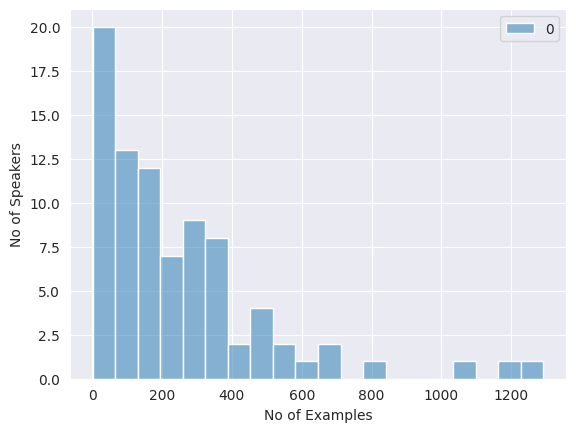

In [13]:
import seaborn
from collections import Counter
import matplotlib.pyplot as plt

speaker_count = Counter(ds["speaker_id"])
seaborn.histplot(speaker_count.values(), bins=20)
plt.xlabel("No of Examples")
plt.ylabel("No of Speakers")
plt.show()

In [14]:
dict(sorted(speaker_count.items(), key=lambda x:x[1]))

{'124932': 1,
 '96945': 2,
 '197870': 4,
 '197772': 4,
 '197776': 5,
 '197756': 8,
 '187917': 13,
 '197472': 14,
 '197778': 17,
 '197469': 18,
 '197868': 24,
 '5392': 28,
 '185771': 30,
 '197869': 31,
 '197420': 33,
 '197467': 37,
 '197782': 39,
 '197455': 42,
 '117491': 43,
 '1946': 59,
 '195454': 73,
 '125019': 78,
 '197773': 78,
 '115868': 80,
 '125037': 81,
 '125106': 84,
 '197709': 86,
 '190519': 98,
 '28463': 102,
 '4243': 111,
 '28266': 115,
 '97513': 123,
 '1956': 128,
 '4560': 131,
 '4508': 138,
 'None': 145,
 '183022': 147,
 '1832': 163,
 '125025': 166,
 '125020': 166,
 '125028': 170,
 '1969': 176,
 '37229': 177,
 '5729': 189,
 '97133': 194,
 '124973': 209,
 '28257': 217,
 '125022': 227,
 '96905': 236,
 '28174': 249,
 '188445': 252,
 '1965': 257,
 '1122': 263,
 '96946': 266,
 '96904': 272,
 '96910': 277,
 '125030': 281,
 '28171': 298,
 '28182': 312,
 '58789': 314,
 '96726': 319,
 '129164': 324,
 '125021': 329,
 '103132': 342,
 '128717': 345,
 '25718': 351,
 '28165': 356,
 '24

In [15]:
len(speaker_count)

84

In [16]:
def select_speaker(speaker_id):
    return 100 <= speaker_count[speaker_id] <=400

ds = ds.filter(select_speaker, input_columns=["speaker_id"])

Loading cached processed dataset at /home/susnato/.cache/huggingface/datasets/facebook___voxpopuli/nl/1.3.0/b5ff837284f0778eefe0f642734e142d8c3f574eba8c9c8a4b13602297f73604/cache-bde1672804b2cd81.arrow


In [17]:
len(ds)

9973

In [18]:
len(set(ds["speaker_id"]))

42

In [19]:
import os
import torch
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)

In [20]:
def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_emb = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_emb = torch.nn.functional.normalize(speaker_emb, dim=2)
        speaker_emb = speaker_emb.squeeze().cpu().numpy()

    return speaker_emb

In [21]:
def prepare_dataset(example):
    audio = example["audio"]
    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    # strip off the batch dimension
    example["labels"] = example["labels"][0]

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [22]:
processor(text=ds[0]["normalized_text"],
        audio_target=ds[0]["audio"]["array"],
        sampling_rate=ds[0]["audio"]["sampling_rate"],
        return_attention_mask=False,)

2023-07-19 14:31:14.726361: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-19 14:31:14.726435: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-19 14:31:14.726441: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


{'input_ids': [4, 14, 7, 6, 4, 28, 7, 9, 4, 9, 7, 7, 13, 4, 18, 10, 46, 9, 4, 21, 5, 27, 8, 5, 15, 4, 7, 15, 15, 5, 5, 9, 4, 18, 5, 6, 4, 5, 5, 9, 4, 25, 13, 5, 14, 5, 4, 18, 5, 5, 13, 14, 5, 13, 11, 5, 10, 14, 4, 14, 10, 5, 4, 20, 10, 46, 4, 12, 7, 18, 5, 9, 4, 57, 8, 5, 28, 5, 9, 26, 2], 'labels': array([[[-1.5776062, -1.211805 , -1.2936182, ..., -3.0351753,
         -2.853447 , -3.245688 ],
        [-1.6962175, -1.0584967, -1.389504 , ..., -3.0680716,
         -2.9974515, -3.1321044],
        [-1.6726049, -1.043248 , -1.3953513, ..., -2.9059525,
         -2.8087   , -3.036763 ],
        ...,
        [-3.146286 , -2.654077 , -2.5307012, ..., -2.5186582,
         -2.782886 , -3.2614517],
        [-2.801958 , -2.7025106, -2.7185073, ..., -2.8466706,
         -3.098153 , -3.396571 ],
        [-2.5554774, -2.6126127, -2.6285412, ..., -3.4410996,
         -3.7568312, -3.940078 ]]], dtype=float32)}

In [23]:
processed_example = prepare_dataset(ds[0])
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [24]:
processed_example

{'input_ids': [4, 14, 7, 6, 4, 28, 7, 9, 4, 9, 7, 7, 13, 4, 18, 10, 46, 9, 4, 21, 5, 27, 8, 5, 15, 4, 7, 15, 15, 5, 5, 9, 4, 18, 5, 6, 4, 5, 5, 9, 4, 25, 13, 5, 14, 5, 4, 18, 5, 5, 13, 14, 5, 13, 11, 5, 10, 14, 4, 14, 10, 5, 4, 20, 10, 46, 4, 12, 7, 18, 5, 9, 4, 57, 8, 5, 28, 5, 9, 26, 2], 'labels': array([[-1.5776062, -1.211805 , -1.2936182, ..., -3.0351753, -2.853447 ,
        -3.245688 ],
       [-1.6962175, -1.0584967, -1.389504 , ..., -3.0680716, -2.9974515,
        -3.1321044],
       [-1.6726049, -1.043248 , -1.3953513, ..., -2.9059525, -2.8087   ,
        -3.036763 ],
       ...,
       [-3.146286 , -2.654077 , -2.5307012, ..., -2.5186582, -2.782886 ,
        -3.2614517],
       [-2.801958 , -2.7025106, -2.7185073, ..., -2.8466706, -3.098153 ,
        -3.396571 ],
       [-2.5554774, -2.6126127, -2.6285412, ..., -3.4410996, -3.7568312,
        -3.940078 ]], dtype=float32), 'speaker_embeddings': array([-8.03417265e-02, -2.44445018e-02,  3.55767980e-02,  1.70068461e-02,
        4

In [25]:
processed_example["labels"].shape, processed_example["speaker_embeddings"].shape

((345, 80), (512,))

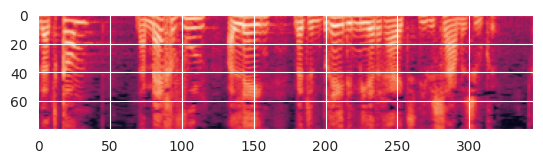

In [26]:
plt.imshow(processed_example["labels"].T)
plt.show()

In [27]:
%%time

ds = ds.map(prepare_dataset, remove_columns=ds.column_names)

Parameter 'function'=<function prepare_dataset at 0x7f52a70ee0d0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/9973 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (614 > 600). Running this sequence through the model will result in indexing errors


CPU times: user 16min 54s, sys: 29 s, total: 17min 22s
Wall time: 3min 12s


In [28]:
def is_not_too_long(input_ids):
    return len(input_ids) < 200

ds = ds.filter(is_not_too_long, input_columns=["input_ids"])
print(len(ds))

Filter:   0%|          | 0/9973 [00:00<?, ? examples/s]

8259


In [29]:
ds = ds.train_test_split(test_size=0.1)

In [30]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [31]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [32]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

In [33]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)

In [34]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_voxpopuli_nl",  # change to a repo name of your choice
    per_device_train_batch_size=8,
    gradient_accumulation_steps=4,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)

In [35]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=ds["train"],
    eval_dataset=ds["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

/home/susnato/PycharmProjects/HF_audio_course/speecht5_finetuned_voxpopuli_nl is already a clone of https://huggingface.co/susnato/speecht5_finetuned_voxpopuli_nl. Make sure you pull the latest changes with `repo.git_pull()`.


In [36]:
import transformers

transformers.logging.set_verbosity_info()

In [37]:
trainer.train()

/home/susnato/temp_files/transformers/src/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7,433
  Num Epochs = 18
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 4
  Total optimization steps = 4,000
  Number of trainable parameters = 144,431,684


Step,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 826
  Batch size = 2
Saving model checkpoint to speecht5_finetuned_voxpopuli_nl/checkpoint-1000
Configuration saved in speecht5_finetuned_voxpopuli_nl/checkpoint-1000/config.json
Model weights saved in speecht5_finetuned_voxpopuli_nl/checkpoint-1000/pytorch_model.bin
Feature extractor saved in speecht5_finetuned_voxpopuli_nl/checkpoint-1000/preprocessor_config.json
tokenizer config file saved in speecht5_finetuned_voxpopuli_nl/checkpoint-1000/tokenizer_config.json
Special tokens file saved in speecht5_finetuned_voxpopuli_nl/checkpoint-1000/special_tokens_map.json
added tokens file saved in speecht5_finetuned_voxpopuli_nl/checkpoint-1000/added_tokens.json
Feature extractor saved in speecht5_finetuned_voxpopuli_nl/preprocessor_config.json
tokenizer config file saved in speecht5_finetuned_voxpopuli_nl/tokenizer_config.json
Special tokens file saved in speecht5_finetuned_voxpopuli_nl/special_tokens_map.json
added tokens file saved in speecht5

TrainOutput(global_step=4000, training_loss=0.5231047415733338, metrics={'train_runtime': 5798.7319, 'train_samples_per_second': 22.074, 'train_steps_per_second': 0.69, 'total_flos': 1.888139258381693e+16, 'train_loss': 0.5231047415733338, 'epoch': 17.2})

In [38]:
trainer.push_to_hub()

Saving model checkpoint to speecht5_finetuned_voxpopuli_nl
Configuration saved in speecht5_finetuned_voxpopuli_nl/config.json
Model weights saved in speecht5_finetuned_voxpopuli_nl/pytorch_model.bin
Feature extractor saved in speecht5_finetuned_voxpopuli_nl/preprocessor_config.json
tokenizer config file saved in speecht5_finetuned_voxpopuli_nl/tokenizer_config.json
Special tokens file saved in speecht5_finetuned_voxpopuli_nl/special_tokens_map.json
added tokens file saved in speecht5_finetuned_voxpopuli_nl/added_tokens.json


Upload file runs/Jul19_14-34-38_susnato-desktop/events.out.tfevents.1689757482.susnato-desktop.21487.0: 100%|#…

To https://huggingface.co/susnato/speecht5_finetuned_voxpopuli_nl
   77080b7..6349f43  main -> main

Dropping the following result as it does not have all the necessary fields:
{'dataset': {'name': 'voxpopuli', 'type': 'voxpopuli', 'config': 'nl', 'split': 'train', 'args': 'nl'}}
To https://huggingface.co/susnato/speecht5_finetuned_voxpopuli_nl
   6349f43..0beb9d6  main -> main



'https://huggingface.co/susnato/speecht5_finetuned_voxpopuli_nl/commit/6349f43f60c8c0fdf9269a4c5aa7bb02a71818c2'